# Import and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [2]:
heart_rate_df = pd.read_csv('/Users/tien/Desktop/Smart_HMS/smart-health-monitoring-system/Model Training/Kaggle Data/heart_rate_data.csv')

# Data Understanding - Heart Rate Data


In [3]:
heart_rate_df.shape

(109486, 3)

In [4]:
heart_rate_df.head(5)

,Timestamp,Heart Rate,Source Name
0,2022-09-13 00:00:36,74.0000,Apple Watch SE 2020
1,2022-09-13 00:05:31,75.0000,Apple Watch SE 2020
2,2022-09-13 00:06:33,78.3673,Apple Watch SE 2020
3,2022-09-13 00:10:30,77.0000,Apple Watch SE 2020
4,2022-09-13 00:18:35,77.0000,Apple Watch SE 2020


In [5]:
heart_rate_df.columns

Index(['Timestamp', 'Heart Rate', 'Source Name'], dtype='object')

In [6]:
heart_rate_df.dtypes

Timestamp       object
Heart Rate     float64
Source Name     object
dtype: object

In [7]:
heart_rate_df.describe()

,Heart Rate
count,109486.000000
mean,89.394449
std,19.261271
min,40.000000
25%,74.000000
50%,90.000000
75%,103.000000
max,176.000000


# Data Preperation - Heart Rate Data

In [8]:
# Convert timestamp to datetime and set as index for heart rate data
heart_rate_df['Timestamp'] = pd.to_datetime(heart_rate_df['Timestamp'])

In [9]:
heart_rate_df.dtypes

Timestamp      datetime64[ns]
Heart Rate            float64
Source Name            object
dtype: object

In [10]:
heart_rate_df.columns

Index(['Timestamp', 'Heart Rate', 'Source Name'], dtype='object')

In [11]:
heart_rate_df.isna().sum()

Timestamp      0
Heart Rate     0
Source Name    0
dtype: int64

In [12]:
heart_rate_df.loc[heart_rate_df.duplicated()]

,Timestamp,Heart Rate,Source Name


In [13]:
heart_rate_df["Source Name"].unique()

array(['Apple Watch SE 2020', 'Apple Watch Ultra'], dtype=object)

# Data Understanding - Sleep Data

In [14]:
sleep_df = pd.read_csv('/Users/tien/Desktop/Smart_HMS/smart-health-monitoring-system/Model Training/Kaggle Data/sleep_data.csv')

In [15]:
sleep_df.shape

(8375, 6)

In [16]:
sleep_df.head(5)

,Start Time,End Time,Category,Timestamp,Heart Rate,Source Name
0,2022-09-13 01:47:49,2022-09-13 01:59:19,Light/Core,2022-09-13 01:46:47,64.0,Apple Watch SE 2020
1,2022-09-13 01:59:19,2022-09-13 02:04:49,Deep,2022-09-13 01:59:47,62.0,Apple Watch SE 2020
2,2022-09-13 02:04:49,2022-09-13 02:12:49,Light/Core,2022-09-13 02:05:44,64.0,Apple Watch SE 2020
3,2022-09-13 02:12:49,2022-09-13 02:27:19,Deep,2022-09-13 02:13:49,65.0,Apple Watch SE 2020
4,2022-09-13 02:27:19,2022-09-13 02:35:49,Light/Core,2022-09-13 02:24:49,64.0,Apple Watch SE 2020


In [17]:
sleep_df.columns

Index(['Start Time', 'End Time', 'Category', 'Timestamp', 'Heart Rate',
       'Source Name'],
      dtype='object')

In [18]:
sleep_df.dtypes

Start Time      object
End Time        object
Category        object
Timestamp       object
Heart Rate     float64
Source Name     object
dtype: object

In [19]:
sleep_df.describe()

,Heart Rate
count,8375.000000
mean,63.988471
std,5.974241
min,46.000000
25%,60.000000
50%,63.000000
75%,67.000000
max,143.000000


# Data Preperation - Sleep Data

In [20]:
sleep_df['Start Time'] = pd.to_datetime(sleep_df['Start Time'])
sleep_df['End Time'] = pd.to_datetime(sleep_df['End Time'])
sleep_df['Timestamp'] = pd.to_datetime(sleep_df['Timestamp'])

In [21]:
sleep_df.dtypes

Start Time     datetime64[ns]
End Time       datetime64[ns]
Category               object
Timestamp      datetime64[ns]
Heart Rate            float64
Source Name            object
dtype: object

In [22]:
sleep_df.head()

,Start Time,End Time,Category,Timestamp,Heart Rate,Source Name
0,2022-09-13 01:47:49,2022-09-13 01:59:19,Light/Core,2022-09-13 01:46:47,64.0,Apple Watch SE 2020
1,2022-09-13 01:59:19,2022-09-13 02:04:49,Deep,2022-09-13 01:59:47,62.0,Apple Watch SE 2020
2,2022-09-13 02:04:49,2022-09-13 02:12:49,Light/Core,2022-09-13 02:05:44,64.0,Apple Watch SE 2020
3,2022-09-13 02:12:49,2022-09-13 02:27:19,Deep,2022-09-13 02:13:49,65.0,Apple Watch SE 2020
4,2022-09-13 02:27:19,2022-09-13 02:35:49,Light/Core,2022-09-13 02:24:49,64.0,Apple Watch SE 2020


In [23]:
sleep_df.isna().sum()

Start Time     0
End Time       0
Category       0
Timestamp      0
Heart Rate     0
Source Name    0
dtype: int64

In [24]:
sleep_df.loc[sleep_df.duplicated()]

,Start Time,End Time,Category,Timestamp,Heart Rate,Source Name


# Time Series Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

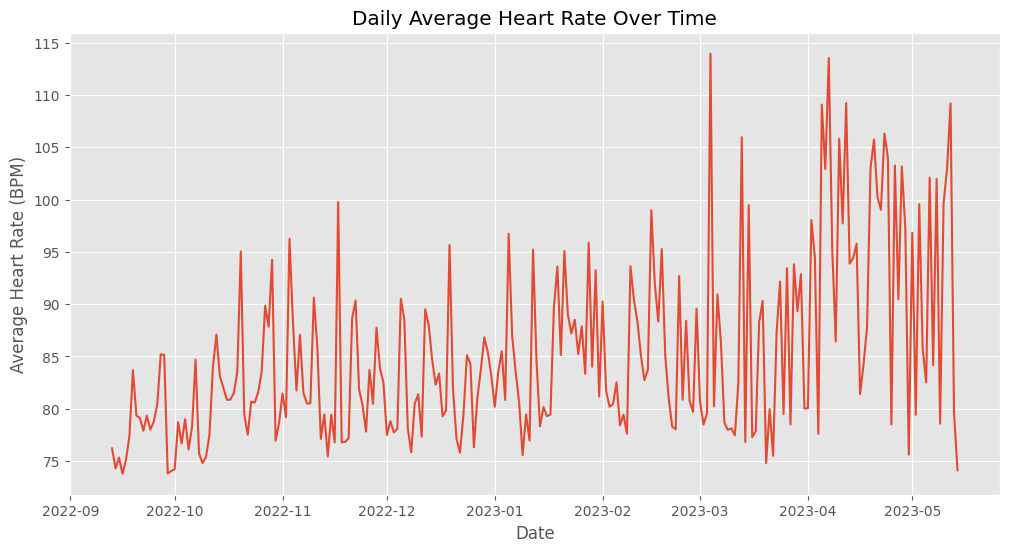

In [26]:
heart_rate_df2 = heart_rate_df.copy()

heart_rate_df2.set_index('Timestamp', inplace=True)

# Resample the heart rate data to a daily average for a clearer trend visualization
daily_heart_rate = heart_rate_df2['Heart Rate'].resample('D').mean()

# Plotting the daily average heart rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_heart_rate)
plt.title('Daily Average Heart Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Average Heart Rate (BPM)')
plt.show()

- Trend: There doesn't appear to be a clear long-term upward or downward trend in the average daily heart rate over the period. This suggests relatively stable heart rate levels over these months.
- Seasonality and Cycles: There are no obvious seasonal patterns, such as weekly or monthly cycles, visible in this plot.
- Variability: While the heart rate remains relatively stable, there are noticeable fluctuations. These could be related to daily activities, stress, exercise, or other factors.

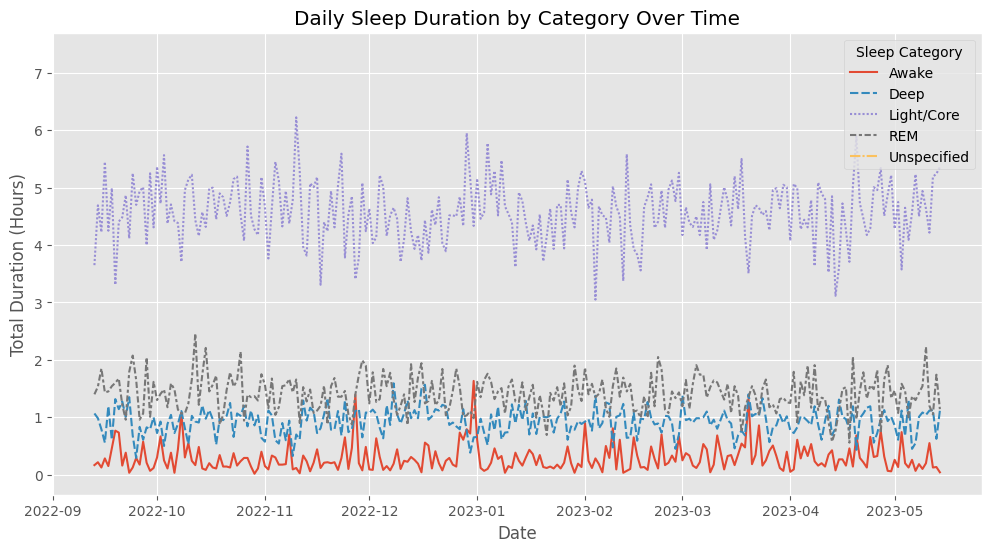

In [27]:
# Calculating the duration of each sleep record
sleep_df['Duration'] = (sleep_df['End Time'] - sleep_df['Start Time']).dt.total_seconds() / 3600  # converting to hours

# Resampling to get daily total duration for each sleep category
daily_sleep_duration = sleep_df.pivot_table(values='Duration', index=sleep_df['Timestamp'].dt.date, columns='Category', aggfunc='sum')

# Plotting the daily total duration for each sleep category
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sleep_duration)
plt.title('Daily Sleep Duration by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Total Duration (Hours)')
plt.legend(title='Sleep Category')
plt.show()

- Trend: Similar to the heart rate data, there is no clear long-term trend in sleep duration for the different categories over the observed period. This suggests a consistency in sleep patterns.
- Sleep Categories: The plot differentiates between sleep categories, such as "Light/Core" and "Deep." We can observe variations in the duration of each category over time.
- Variability: There is noticeable variability in the duration of different sleep stages. This could be influenced by factors such as daily routine, stress, physical activity, and overall health.
- Seasonality and Cycles: There are no apparent seasonal patterns or regular cycles. However, some days show significant deviations from the average, which could be due to specific events or changes in routine.

# Correlation Analysis

In [28]:
# Calculate the correlation between the average heart rate during sleep and specific sleep stages

# Calculate the average heart rate during each sleep session
def calculate_avg_heart_rate_for_sleep(row):
    start_time = row['Start Time']
    end_time = row['End Time']
    relevant_heart_rates = heart_rate_df[(heart_rate_df['Timestamp'] >= start_time) & (heart_rate_df['Timestamp'] <= end_time)]
    return relevant_heart_rates['Heart Rate'].mean() if not relevant_heart_rates.empty else None

sleep_df['Avg Heart'] = sleep_df.apply(calculate_avg_heart_rate_for_sleep, axis=1)

# Remove rows with null values in 'Avg Heart Rate During Sleep'
sleep_df_clean = sleep_df.dropna(subset=['Avg Heart'])

In [29]:
# Ensure that only numeric columns are included in the correlation calculation

# Step 1: Create Dummy Variables for 'Category'
category_dummies = pd.get_dummies(sleep_df_clean['Category'], prefix='Category')

# Step 2: Concatenate the sleep_df_clean with the dummy variables
sleep_df_with_category_dummies = pd.concat([sleep_df_clean, category_dummies], axis=1)

# Step 3: Ensure only numeric columns are included in the correlation calculation
# Selecting numeric columns, which will include the dummy variables and the 'Avg Heart'
numeric_columns_for_corr = sleep_df_with_category_dummies.select_dtypes(include=[float, int])

# Step 4: Calculate the correlation
correlations_with_sleep_stages = numeric_columns_for_corr.corr()['Avg Heart'].drop('Avg Heart')
correlations_with_sleep_stages

Heart Rate    0.817512
Duration     -0.044308
Name: Avg Heart, dtype: float64

The correlation coefficient between the average heart rate during sleep and the duration of sleep is approximately −0.044. This value indicates a very weak negative correlation. In other words, as the duration of sleep changes, there's a minimal tendency for the average heart rate during sleep to move in the opposite direction. However, the correlation is so weak that it's not practically significant.

This finding suggests that, at least in this dataset, the duration of sleep has little to no impact on the average heart rate during sleep. This might be due to various factors, such as the inherent variability in heart rate due to other physiological or environmental factors, or the possibility that the duration of sleep is not a strong determinant of heart rate.

In [40]:
# Explicitly verifying that the dummy variables are correctly included in the correlation calculation

# Creating dummy variables for the sleep categories
sleep_category_dummies = pd.get_dummies(sleep_df_clean['Category'], prefix='SleepStage')

# Merging these dummies with the sleep_df_clean DataFrame
sleep_df_with_dummies = pd.concat([sleep_df_clean, sleep_category_dummies], axis=1)

# Ensuring that the merged DataFrame has the correct structure
print(sleep_df_with_dummies.columns)

# Recalculating the correlations, focusing on the dummy variables for sleep categories
correlation_with_sleep_stages = sleep_df_with_dummies[['Avg Heart', 'SleepStage_Awake', 'SleepStage_Deep', 'SleepStage_Light/Core', 'SleepStage_REM', 'SleepStage_Unspecified']].corr()['Avg Heart']
correlation_with_sleep_stages.drop('Avg Heart')


Index(['Start Time', 'End Time', 'Category', 'Timestamp', 'Heart Rate',
       'Source Name', 'Duration', 'Avg Heart', 'SleepStage_Awake',
       'SleepStage_Deep', 'SleepStage_Light/Core', 'SleepStage_REM',
       'SleepStage_Unspecified'],
      dtype='object')


SleepStage_Awake         -0.067346
SleepStage_Deep           0.214159
SleepStage_Light/Core    -0.059460
SleepStage_REM           -0.078078
SleepStage_Unspecified   -0.009774
Name: Avg Heart, dtype: float64

The correlation analysis between the average heart rate during sleep and specific sleep stages, with the corrected approach, provides the following results:

- Awake (SleepStage_Awake): −0.067, indicating a very weak negative correlation.
- Deep (SleepStage_Deep): 0.214, showing a weak positive correlation.
- Light/Core (SleepStage_Light/Core): −0.059, a very weak negative correlation.
- REM (SleepStage_REM): −0.078, a weak negative correlation.
- Unspecified (SleepStage_Unspecified): −0.010, indicating almost no correlation.

The results indicate a weak positive correlation with deep sleep and very weak to almost no correlations with the other stages, suggesting that the average heart rate tends to be slightly higher during deep sleep compared to other stages, although the relationship is not strong. The negative correlations for the other stages are weak, suggesting a minimal or no relationship between these sleep stages and the average heart rate.